In [3]:
%config Completer.use_jedi = False

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import pandas as pd

#reading the image 

image = cv2.imread('p1.jpg') 
#converting image to RGB
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#plotting the grayscale image
r, g, b = cv2.split(image)

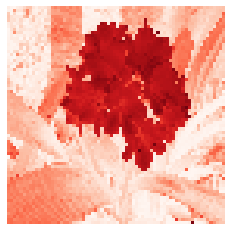

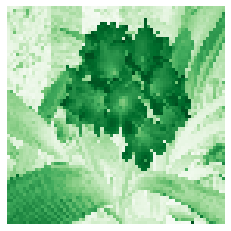

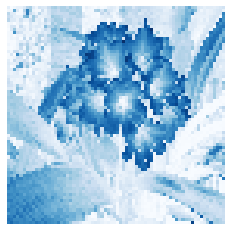

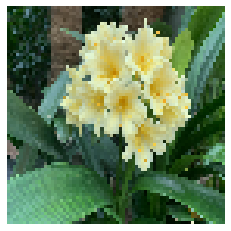

In [250]:
image_new = cv2.resize(image, (70,70)) / 255
r, g, b = cv2.split(image_new)

fig, ax = plt.subplots()
ax.imshow(r, cmap = 'Reds')
ax.axis('off')
fig.savefig('r.jpg', bbox_inches='tight', pad_inches=0, dpi= 300)

fig, ax = plt.subplots()
ax.imshow(g, cmap = 'Greens')
ax.axis('off')
fig.savefig('g.jpg', bbox_inches='tight', pad_inches=0, dpi= 300)

fig, ax = plt.subplots()
ax.imshow(b, cmap = 'Blues')
ax.axis('off')
fig.savefig('b.jpg', bbox_inches='tight', pad_inches=0, dpi= 300)

fig, ax = plt.subplots()
ax.imshow(image_new)
ax.axis('off')
fig.savefig('rgb.jpg', bbox_inches='tight', pad_inches=0, dpi= 500)

In [215]:
w, h, c = image_new.shape

In [216]:
r1 = r.reshape(1, w*h )
g1 = g.reshape(1, w*h )
b1 = b.reshape(1, w*h)


In [230]:
df = pd.DataFrame(np.concatenate([r1, g1, b1], axis=0))
cols = df.columns.tolist()
s = pd.Series(cols)
cols = s.sample(len(s), random_state = 123).tolist()

In [231]:
dfx = df[cols]

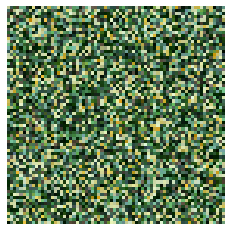

In [241]:
l1 = dfx.iloc[0].values.reshape(w, h, 1)
l2 = dfx.iloc[1].values.reshape(w, h, 1)
l3 = dfx.iloc[2].values.reshape(w, h, 1)
rd = np.concatenate([l1, l2, l3], axis=-1)

fig, ax = plt.subplots()
ax.imshow(rd)
ax.axis('off')
fig.savefig('rd.jpg', bbox_inches='tight', pad_inches=0, dpi= 300)

In [261]:
from molmap import AggMolMap

In [273]:
mp = AggMolMap(dfx, metric = 'cosine')

2021-08-10 10:47:14,341 - INFO - [bidd-molmap] - Calculating distance ...
2021-08-10 10:47:15,580 - INFO - [bidd-molmap] - the number of process is 16


100%|##########| 4900/4900 [00:04<00:00, 1155.19it/s]


In [274]:
mp.fit(cluster_channels = 1, emb_method = 'umap')

2021-08-10 10:57:13,485 - INFO - [bidd-molmap] - applying hierarchical clustering to obtain group information ...
UMAP(metric='precomputed', random_state=32, verbose=2)
Construct fuzzy simplicial set
Tue Aug 10 10:57:14 2021 Finding Nearest Neighbors
Tue Aug 10 10:57:15 2021 Finished Nearest Neighbor Search


/home/shenwanxiang/.local/lib/python3.6/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


Tue Aug 10 10:57:15 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Aug 10 10:57:23 2021 Finished embedding
2021-08-10 10:57:24,100 - INFO - [bidd-molmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-08-10 10:58:06,912 - INFO - [bidd-molmap] - Finished


In [275]:
X = mp.batch_transform(dfx.values,scale = False)

100%|##########| 3/3 [00:00<00:00, 5182.42it/s]


In [276]:
X_new = np.concatenate([X[0,:,:], X[1,:,:], X[2,:,:]], axis=-1)

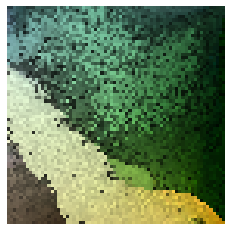

In [277]:
fig, ax = plt.subplots()

ax.imshow(X_new)
ax.axis('off')
fig.savefig('rs.jpg', bbox_inches='tight', pad_inches=0, dpi= 300)